# Excerpts of GWStrainPlotsSNR for pretty plots for poster and paper, pretty much all the plots in that notebook plus histograms

In [1]:
# Started WEG  20180408. 
# See the gwtools.py which has utility and strain functions in it
# and ExopDBase notebook that can download a new csv exop database.

## Table of Contents (trying this)

1. [References](#refs)

<a id="refs"></a>
# References
P. Amaro-Seoane et al. "Triplets of supermassive black holes: astrophysics, gravitational waves and detection," MNRAS 402 2308-2320 (2010).

P. C. Peters and J. Mathews, "Gravitational Radiation from Point Masses in a Keplerian Orbit," Phys. Rev. 131 (1963) 435-440.

Michele Maggiore, "Gravitational Waves. Volume 1: Theory and Experiments," Oxford Univ. Press, 2008.

Shane Larson, "Sensitivity Curves for ..."  http://www.srl.caltech.edu/~shane/sensitivity/

Neil Cornish and Travis Robson, "The construction and use of LISA sensitivy curves," https://arxiv.org/abs/1803.01944

In [2]:
import sys, os
import numpy as np
import urllib as ul
import pandas as pd
import gwTools as gwt
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.interpolate as spint
import seaborn as sea

## For some pretty print advice from Astro colleagues and online pointers.
## From https://matplotlib.org/users/customizing.html

If following is in Matplotlib config dir (run matplotlib.get_configdir() ), or maybe in 
~/.config/matplotlib  create mpl_configdir/stylelib/presentation.mplstyle with

axes.titlesize : 24

axes.labelsize : 20

lines.linewidth : 3

lines.markersize : 10

xtick.labelsize : 16

ytick.labelsize : 16

Then use in the script
plt.style.use('presentation')

In [3]:
print( plt.style.available )
#plt.style.use('ggplot')

['_classic_test', 'dark_background', 'ggplot', 'seaborn-notebook', 'seaborn-paper', 'seaborn-ticks', 'fast', 'seaborn', 'bmh', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-muted', 'seaborn-white', 'seaborn-bright', 'seaborn-talk', 'seaborn-poster', 'Solarize_Light2', 'seaborn-whitegrid', 'seaborn-darkgrid', 'seaborn-dark', 'seaborn-colorblind', 'grayscale', 'fivethirtyeight', 'classic', 'seaborn-deep']


In [4]:
if 0:
    plt.rcParams.update({'axes.titlesize' : 24})
    plt.rcParams.update({'axes.labelsize' : 20})
    plt.rcParams.update({'lines.linewidth' : 3})
    plt.rcParams.update({'lines.markersize' : 10})
    plt.rcParams.update({'xtick.labelsize' : 16})
    plt.rcParams.update({'ytick.labelsize' : 16})

In [5]:
# https://matplotlib.org/users/customizing.html
# The font.size property is the default font size for text, given in pts.
# 10 pt is the standard value.
#
#font.family         : sans-serif
#font.style          : normal
#font.variant        : normal
#font.weight         : medium
#font.stretch        : normal
# note that font.size controls default text sizes.  To configure
# special text sizes tick labels, axes, labels, title, etc, see the rc
# settings for axes and ticks. Special text sizes can be defined
# relative to font.size, using the following values: xx-small, x-small,
# small, medium, large, x-large, xx-large, larger, or smaller
#font.size           : 10.0
#font.serif          : DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif     : DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive        : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
#font.fantasy        : Comic Sans MS, Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace      : DejaVu Sans Mono, Bitstream Vera Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace


In [6]:
# Plot defaults.
params = {'font.size': 24.0,
          'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),  # (14,10)
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
#aa = 18.0
#params = {'legend.fontsize': aa,
#          'figure.figsize': (14, 10),
#         'axes.labelsize': aa,
#         'axes.titlesize': aa,
#         'xtick.labelsize': aa,
#         'ytick.labelsize': aa}
plt.rcParams.update(params)
#print(mpl.rcParams)
savePlot = False

## Read the dbase saved in GWStrainPlotsSNR or other method.

In [7]:
thisDir = os.getcwd()  # This is the /python subdirectory.
csvDir = thisDir + '/../dbases/'  # Will the /../ work on non-Unices?
pixDir = thisDir + '/../pix/'
csvFileName = csvDir + 'exopP_20180408_141319.csv' 

print('Using database file ' + csvFileName)
with open(csvFileName, 'r') as ifile:
    print(ifile.readline(), '\n', ifile.readline() )  #Print a couple of lines and reset the pointer.

    ifile.seek(0);

    dbData = pd.read_csv(ifile)  # Read in the whole file to a Panda Dataframe, handles NaN's nicely, see below.
    #ifile.close()  # Should close when you leave the "with."

Using database file /home/gabella/Documents/astro/exop/exoplanetsMath/python/../dbases/exopP_20180408_141319.csv
pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
 
 HD 142022 A,b,Radial Velocity,1928.00000000,3.030000,0.530000,5.10000,35.87,0.99,2014-05-14,27.88



In [8]:
dbData.head(5)

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
0,HD 142022 A,b,Radial Velocity,1928.000000,3.0300,0.5300,5.100,35.87,0.99,2014-05-14,27.88
1,HD 39091,b,Radial Velocity,2151.000000,3.3800,0.6405,10.270,18.21,1.10,2014-07-23,54.92
2,HD 137388 A,b,Radial Velocity,330.000000,0.8900,0.3600,0.223,38.45,0.86,2014-05-14,26.01
3,GJ 3021,b,Radial Velocity,133.710000,0.4900,0.5110,3.370,17.62,0.90,2014-05-14,56.76
4,HD 63454,b,Radial Velocity,2.818049,0.0368,0.0000,0.398,35.80,0.84,2015-03-26,27.93


## Drop the NaNs

In [9]:
#  called aData because I expected a bData, etc.
#
# {"pl_hostname", "pl_letter", "pl_discmethod", "pl_orbper", \
# "pl_orbsmax", "pl_orbeccen", "pl_bmassj", "st_dist", "st_mass", \
# "rowupdate", "st_plx"}
print('Length all data, dbData ', len(dbData) )
aData = dbData.copy()

aData = aData.dropna(axis = 0, how = 'any', subset = ['st_mass'])
print('Length with st_mass\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_bmassj'])
print('Length with pl_bmassj\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['st_dist'])
print('Length with st_dist\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_orbeccen'])
print('Length with pl_orbeccen\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_orbper'])
print('Length with pl_orbper\t', len(aData) )

aData = aData.dropna(axis = 0, how = 'any', subset = ['pl_orbsmax'])
print('Length with pl_orbsmax\t', len(aData) )


Length all data, dbData  3711
Length with st_mass	 3418
Length with pl_bmassj	 1344
Length with st_dist	 1089
Length with pl_orbeccen	 933
Length with pl_orbper	 933
Length with pl_orbsmax	 910


##  That gets the data in, several plots of just of the functions $g(n,e)$ and $\sqrt(g(n,e))/n$

## The functions/theory

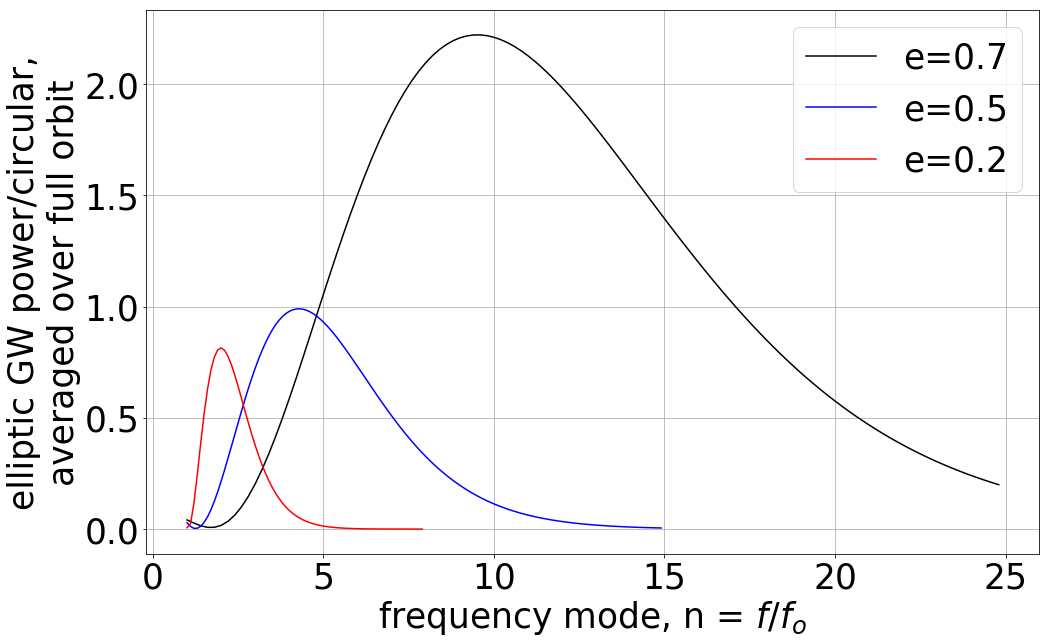

In [10]:
# Use the gwtools.py definitions.

afig = plt.figure( )
ax = afig.add_subplot((111))

# eccentricities, Peters and Mathews, 0.2, 0.5, 0.7  add 0.9??
xx = np.arange(1, 25, 0.2)
yy = gwt.ggSimp(xx, 0.7)

ax.set_xlabel('frequency mode, n = $f/f_{o}$')
ax.set_ylabel('elliptic GW power/circular,\naveraged over full orbit')

plt.grid(True)

ax.plot(xx, yy, 'k-', label = 'e=0.7')

x2 = np.arange(1, 15, 0.1)
y2 = gwt.ggSimp(x2, 0.5)
ax.plot(x2, y2, 'b-', label = 'e=0.5')

x3 = np.arange(1, 8, 0.1)
y3 = gwt.ggSimp(x3, 0.2)
ax.plot(x3, y3, 'r-', label = 'e=0.2')

ax.legend()  # AFter the plot calls, to get labels.

if savePlot:
    #plt.savefig('../poster/pix/plot_g_n_e.eps')  # Both eps and svg seem to make good PDFs of poster.
    plt.savefig('../poster/pix/plot_gne.svg')

## Plot $\sqrt{g(n,e)}/n$ proportional to $h_{n}$ dimensionless

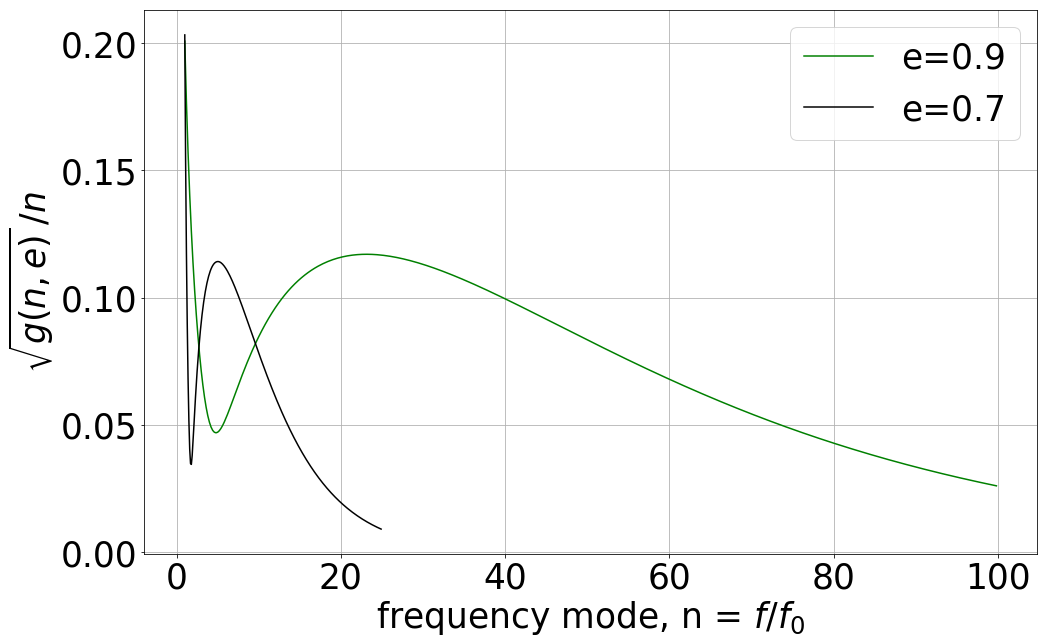

In [11]:
# Use the gwtools.py definitions.

afig = plt.figure( )
ax = afig.add_subplot((111))

# eccentricities, Peters and Mathews, 0.2, 0.5, 0.7  add 0.9??
xx = np.arange(1, 100, 0.2)
yy = [ np.sqrt(uu)/nn for nn, uu in zip(xx, gwt.ggSimp(xx, 0.9) ) ]

ax.set_xlabel('frequency mode, n = $f/f_{0}$')
#ax.set_ylabel('dimensionless strain, $h_{n}(f = n\,f_{o})$')
ax.set_ylabel('$\sqrt{g(n,e)}\,/n$')

ax.plot(xx, yy, 'g-', label = 'e=0.9')

x2 = np.arange(1, 25, 0.1)
y2 = [ np.sqrt(uu)/nn for nn, uu in zip(xx, gwt.ggSimp(x2, 0.7) ) ]
ax.plot(x2, y2, 'k-', label = 'e=0.7')

plt.grid(True)
ax.legend()  # AFter the plot calls, to get labels.

if savePlot:
    #plt.savefig('../poster/pix/plot_g_n_e.eps')  # Both eps and svg seem to make good PDFs of poster.
    plt.savefig('../poster/pix/plot_h_as_gne.svg')

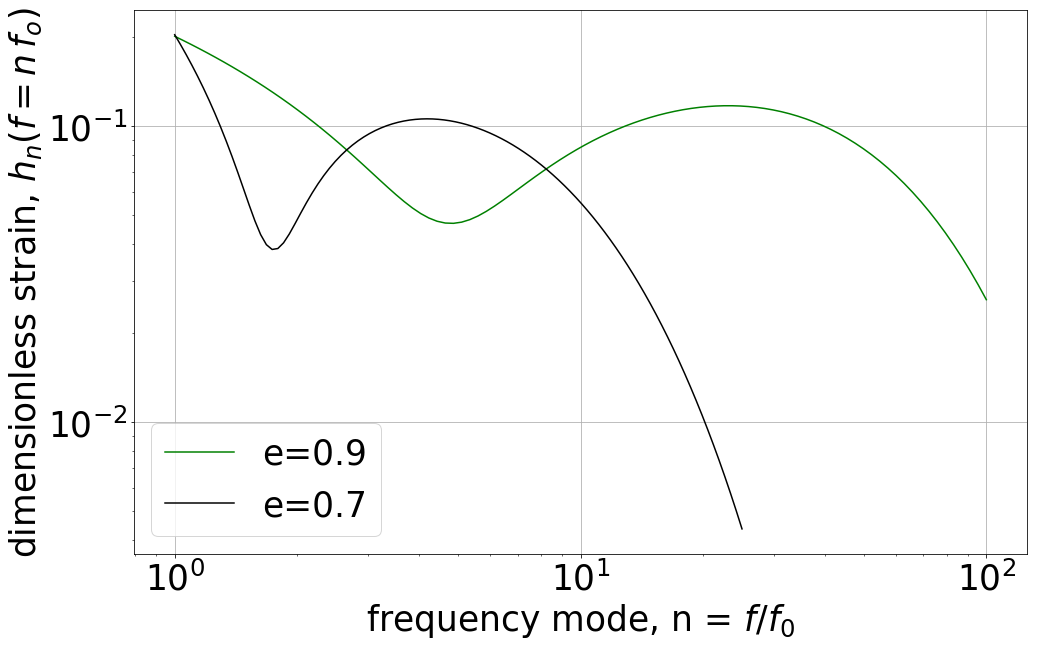

In [12]:
# Use the gwtools.py definitions.

afig = plt.figure( )
ax = afig.add_subplot((111))

# eccentricities, Peters and Mathews, 0.2, 0.5, 0.7  add 0.9??
xx = np.linspace(np.log10(1), np.log10(100), 100)
xx = np.power(10,xx)
yy = [ np.sqrt(uu)/nn for nn, uu in zip(xx, gwt.ggSimp(xx, 0.9) ) ]

ax.set_xlabel('frequency mode, n = $f/f_{0}$')
ax.set_ylabel('dimensionless strain, $h_{n}(f = n\,f_{o})$')

ax.loglog(xx, yy, 'g-', label = 'e=0.9')

#x2 = np.arange(1, 25, 0.1)
x2 = np.linspace(np.log10(1), np.log10(25), 100)
x2 = np.power(10,x2)
y2 = [ np.sqrt(uu)/nn for nn, uu in zip(xx, gwt.ggSimp(x2, 0.7) ) ]
ax.loglog(x2, y2, 'k-', label = 'e=0.7')

plt.grid(True)
ax.legend()  # AFter the plot calls, to get labels.

if savePlot:
    #plt.savefig('../poster/pix/plot_g_n_e.eps')  # Both eps and svg seem to make good PDFs of poster.
    plt.savefig('../poster/pix/plot_h_as_gne_loglog.svg')

## Histograms of NASA Archive, AFTER the filter
## A list of the columns to histogram, from ExopDBaseHistos notebook

In [13]:
histCols = ['pl_orbeccen', 'pl_orbper', 'pl_orbsmax', 'pl_bmassj', 'st_dist', 'st_mass']
titles = ['Eccentricity', 'Orbital Period', 'SemiMajor Axis', 'Planet Mass', 'Stellar Distance', 'Stellar Mass']
xlabels = ['eccentricity, e', 'orbital period (d)', 'semi-major axis (au)', 'planet mass (M_J)', 
           'stellar distance (pc)', 'stellar mass (M_sol)']

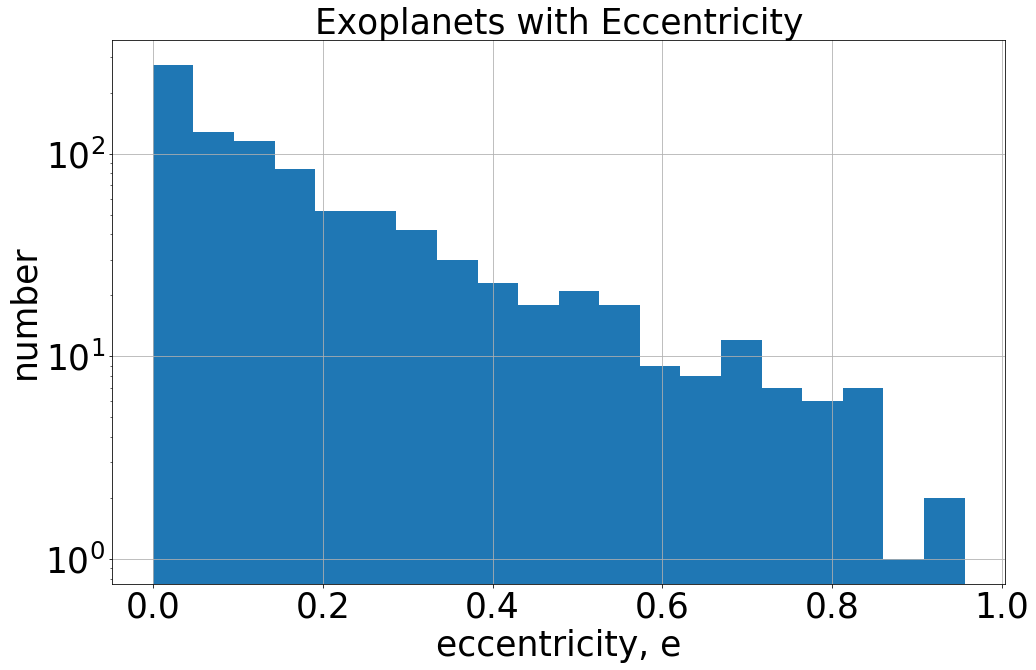

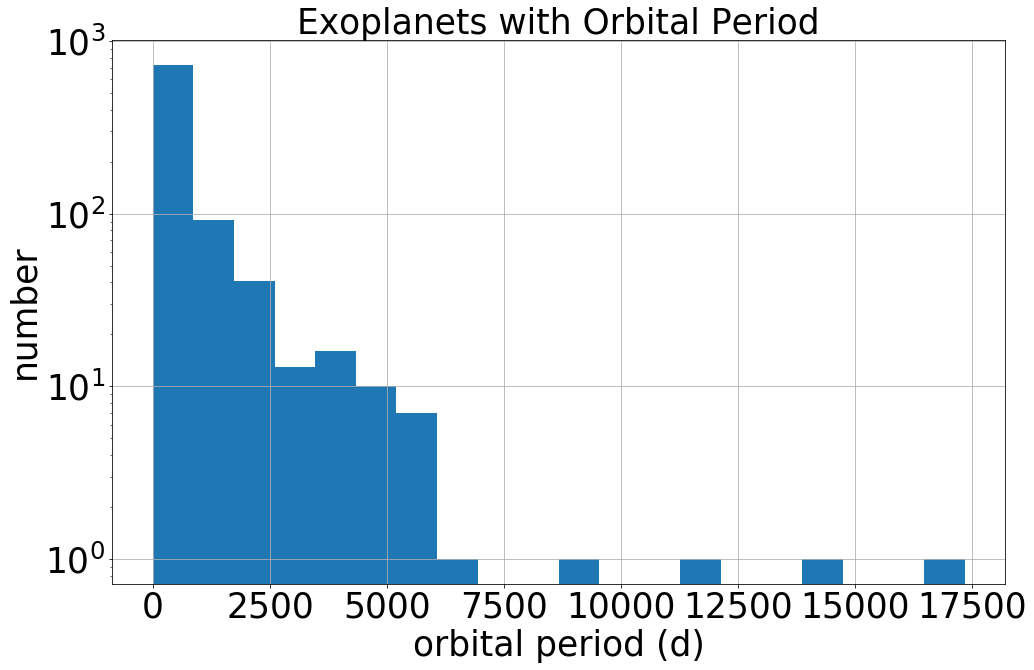

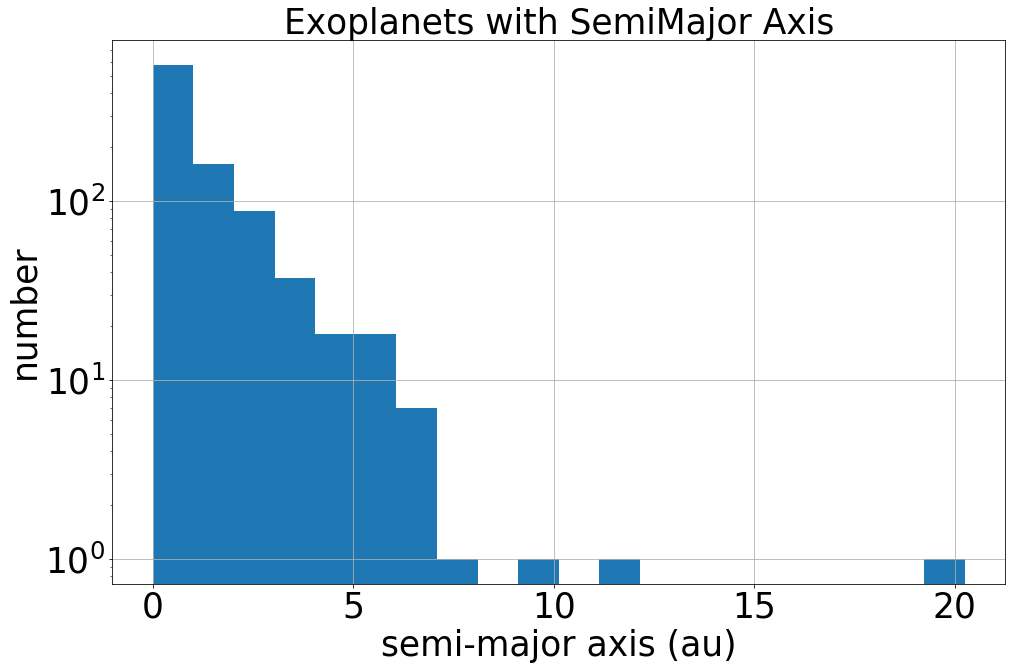

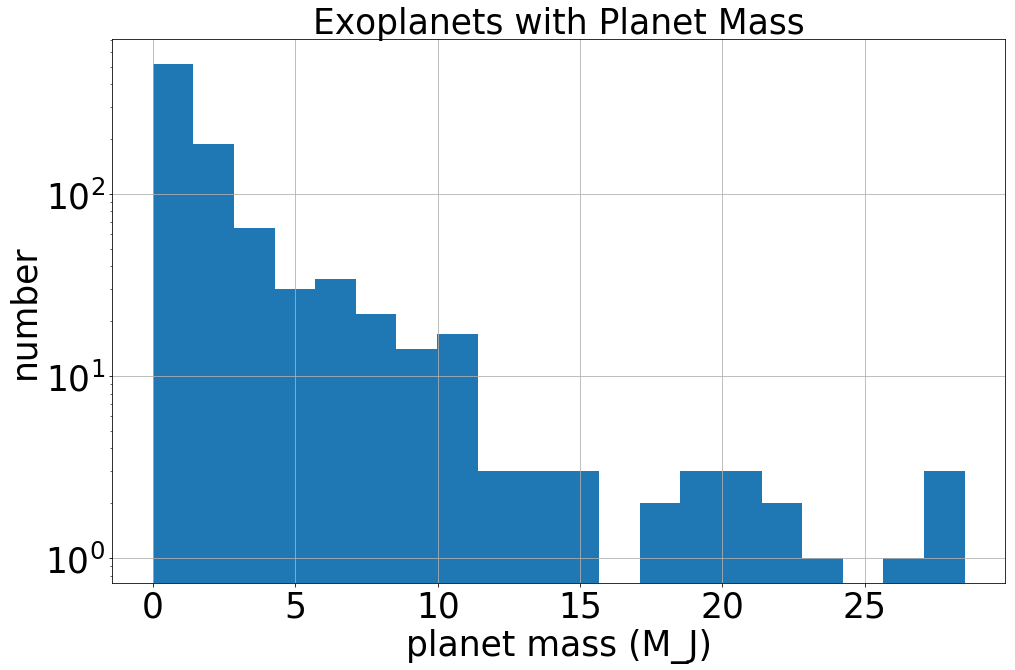

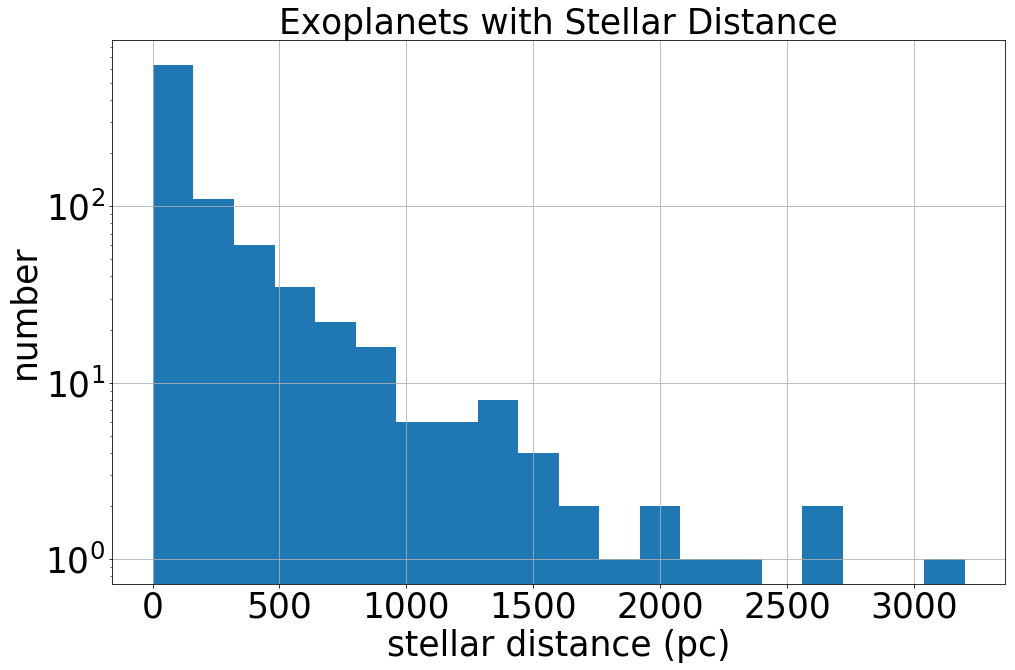

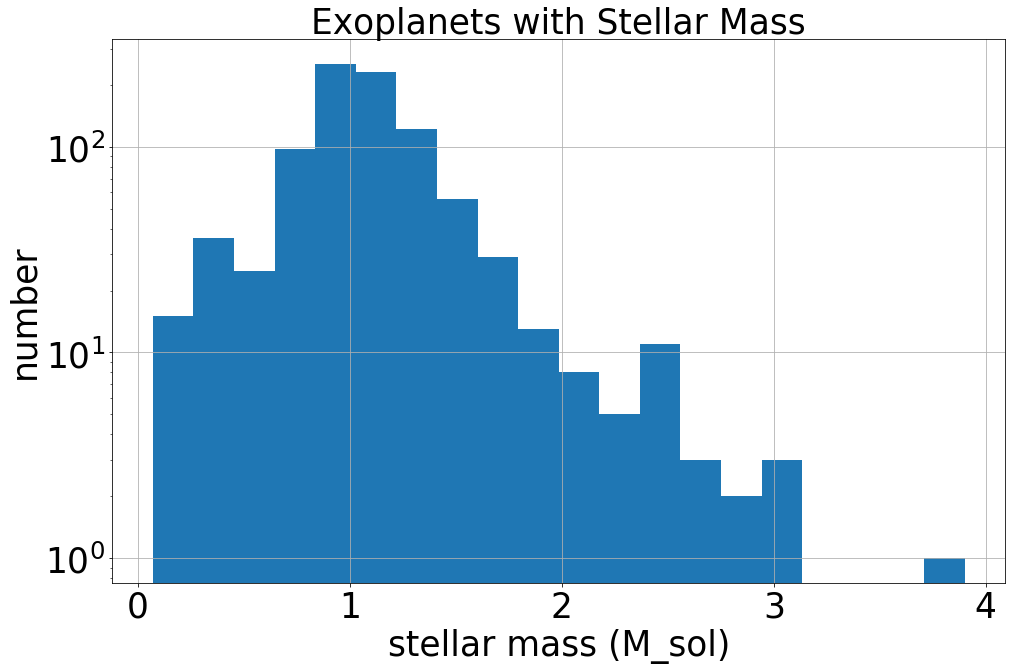

In [14]:
figs=[]
axs=[]
for icol, ititle, ixlabel in zip(histCols, titles, xlabels):
    # time to get fancy
    afig = plt.figure( )
    figs.append( afig )
    ax = afig.add_subplot((111))
    axs.append( ax )
    aData.hist(icol, ax=ax, bins=20)
    ax.set_title('Exoplanets with ' + ititle)
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('number')
    ax.set_xlabel(ixlabel)
    if savePlot and ititle == 'Eccentricity': # Save the figure
        plt.savefig('../poster/pix/exopEccenHisto.svg') # LibreOffice import SVG histos / bar charts badly.
        plt.savefig('../poster/pix/exopEccenHisto.png') # PNGs seem okay, SVGs continue the blue bar below the axis.
    plt.show()

## Chirp mass histo

In [15]:
# Some scipy.constants for comparison mostly.
from scipy.constants import speed_of_light, gravitational_constant, c, G, pi

massSun = 1.989e30; #(*kg *)
massJ = 1.898e27; #(* kg *)
massE = 5.972e24; #(* kg *)
massJe = massJ/massE; #(* Jupiter mass is 317.9 earth masses *)
massJs = massJ/massSun; #(* relative to the sun's mass *)

pc = 30.86e15; #(* meters, parsec *)
au = 149.6e9; #(* meters, astron unit *)

cee = 299792458.0; #(* meters/s, speed of light *)
print('Compare my cee ', cee, ' and scipy.constants ', speed_of_light)
cee = speed_of_light # Use the scipy.constants one.
secsYear = 365.24*24.0*3600.0; #(* s, number of seconds in a year *) # What do astronomers use for this conversion?
secsDay = 24.0*3600.0; #(* s, number of seconds in a day *)

bigG = 6.67408e-11; #(* SI Gravitational constant, m^3/kg/s *)
print('Compare my bigG ', bigG, ' and scipy.constants ', gravitational_constant)
bigG = gravitational_constant

rscon = 2*bigG*massSun/(cee*cee) #(* 2955.43 m, solar mass Scharzschild radius *)
lunits = bigG*massSun/(cee*cee) #(* meters per solar mass, units of G=c=1, no factor
#of 2 as in Schwarzschild radius *)
masscon = lunits; #(* m, G Msol/c^2, for 1 solar mass *)
powercon = cee**5/bigG  #(* 3.628e52 W, c^5/G, W/unit since P is dimensionless in G=c=1 units *)
energycon = (cee**4)/bigG  #(* 1.210e44 J/m, c^4/G *)

Compare my cee  299792458.0  and scipy.constants  299792458.0
Compare my bigG  6.67408e-11  and scipy.constants  6.67408e-11


## Orbital frequency

In [16]:
# append orbital frequency in Hz!
orbFreqs = []
for irow in range(len(aData)):
    aa = 1.0/( aData['pl_orbper'].values[irow]*secsDay )
    orbFreqs.append( aa )
    

aData['orbFreqs'] = np.array(orbFreqs)

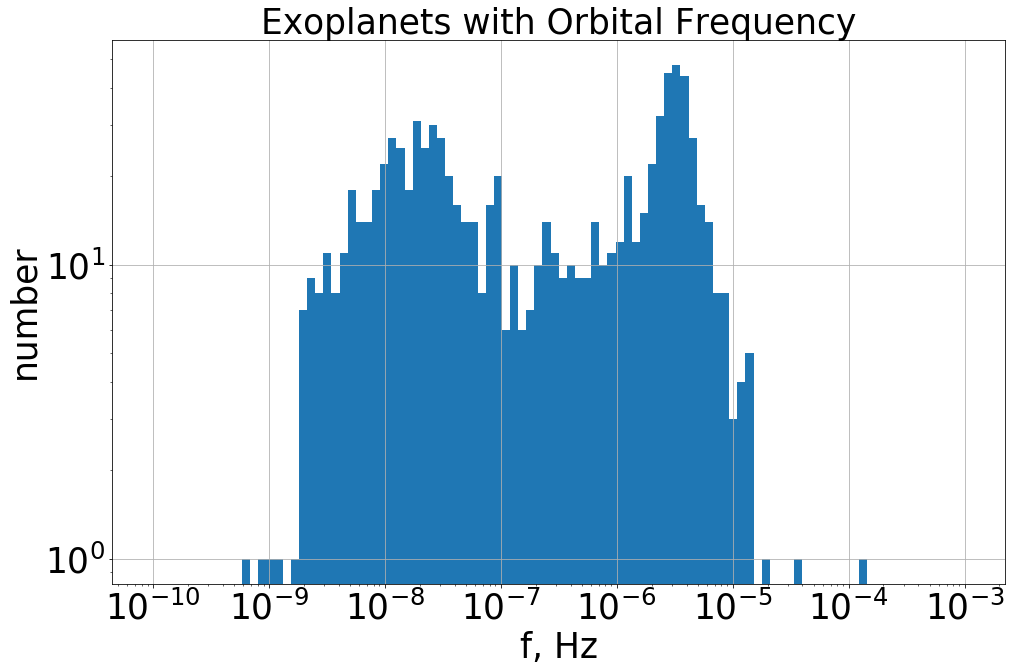

Round trip time for LISA lasers along leg  16.6782047599076  secs,  and frequency of  0.0599584916  Hz.
Orbital frequency in Hz, NOT with GW modeset yet  0.0001275994649772808


In [17]:
# time to get fancy
afig = plt.figure( )

ax = afig.add_subplot((111))

# Log plot need even bins in Log-Space??
binmin = 1e-10
binmax = 0.001
nbins = 100
mybins = np.logspace(np.log10(binmin), np.log10(binmax), (nbins+1))


aData.hist('orbFreqs', ax=ax, bins=mybins)
ax.set_title('Exoplanets with Orbital Frequency')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('number')
#ax.set_ylim( (0.7, 2000) )
ax.set_xscale('log')
ax.set_xlabel('f, Hz')

if savePlot:
    plt.savefig('../poster/pix/exopOrbFreqsHisto.svg')
    plt.savefig('../poster/pix/exopOrbFreqsHisto.png')
plt.show()

#Print the max orb freq
print( 'Round trip time for LISA lasers along leg ', (2.0*2.5e9)/cee, ' secs,  and frequency of ',
      cee/(2.0*2.5e9), ' Hz.' )
print( 'Orbital frequency in Hz, NOT with GW modeset yet ', np.max( aData['orbFreqs'].values ) )

## Chrip Mass histo

In [18]:
# append chirp mass to 
chirpMs = []
for irow in range(len(aData)):
    m1 = aData['st_mass'].values[irow]*massSun
    m2 = aData['pl_bmassj'].values[irow]*massJ
    aa = (m1*m2)**(3/5)/(m1+m2)**(1/5)/massSun
    chirpMs.append( aa )
    
aData['chirpMassMsols'] = np.array(chirpMs)

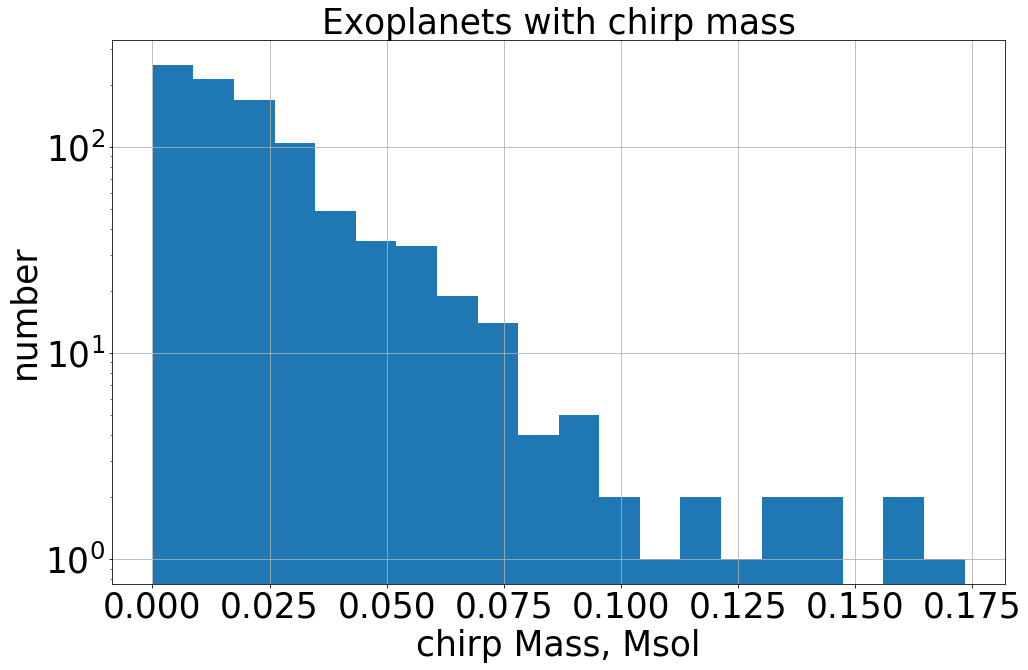

In [19]:
# time to get fancy
afig = plt.figure( )

ax = afig.add_subplot((111))

aData.hist('chirpMassMsols', ax=ax, bins=20)
ax.set_title('Exoplanets with chirp mass')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('number')
ax.set_xlabel('chirp Mass, Msol')
if savePlot:
    plt.savefig('../poster/pix/exopChirpMHisto.svg')
    plt.savefig('../poster/pix/exopChirpMHisto.png')
plt.show()

## Append the rows I need for the modeset and GW freqs histo

In [20]:
# Actually append n_min, n_max, numpy array of GW strains h.
# In the Mathematica JustStrainPlots.nb, about 40% down, calc hhVfreq first time.

hhmodesCol = []  # Setup a list of the hhmodes that will be appended to the dataframe.
modesCol = []    # The modes set acually used for the calculation, int(modeMin) to int(modeMax)+1
freq0Col = []    # Collect the orbital frequency that was used.

for irow in range(len(aData)):
    # Calculate the SI parameters needed by the strains and the strain "front coefficient."
    
    orbeccen = aData['pl_orbeccen'].values[irow]
    modeMax = gwt.aNmax( orbeccen )  # The "max" mode number where g(n,e) returns to 1/20th its peak value.
    modeMin = gwt.aNmin( orbeccen )  # Either 1 for e>0 or 2 for e=0.
    #
    m1 = aData['pl_bmassj'].values[irow]*massJ
    m2 = aData['st_mass'].values[irow]*massSun
    smax = aData['pl_orbsmax'].values[irow]*au
    dL = aData['st_dist'].values[irow]*pc
    freq0 = 1.0/( aData['pl_orbper'].values[irow]*secsDay )
    # Amaro-Seoane Eqn. (9)...common terms.
    frontCoeff = np.power(bigG,5/3.)/cee**4 * 2 * np.sqrt(32/5.) * np.power( gwt.chirpM(m1,m2), 5/3.)*\
    np.power((2*np.pi*freq0), 2/3.)/dL
    if irow > 6 and irow < 10:
        print('irow is ', irow, ' ,frontCoeff is ', frontCoeff, ' pl_orbeccen is ', orbeccen)

    # Now loop over the GW modes and calc the dim-less strain and the modes used.
    hhmodes = [ frontCoeff* np.sqrt( gwt.ggSimp(uu, orbeccen) )/uu for uu in range(int(modeMin), int(modeMax)+1)  ]
    modes = [ uu for uu in range(int(modeMin), int(modeMax)+1)  ]
    
    # Append to the list.
    hhmodesCol.append( hhmodes )
    modesCol.append( modes )
    freq0Col.append( freq0 )
       
#Append the hhmodesCol to the dataframe, for ease of getting at the other attributes.
aData['freq0'] = freq0Col
aData['modes'] = modesCol
aData['hhmodes'] = hhmodesCol

aData.head(3)

irow is  7  ,frontCoeff is  4.6311021600204593e-26  pl_orbeccen is  0.03
irow is  8  ,frontCoeff is  2.169114619938696e-26  pl_orbeccen is  0.41
irow is  9  ,frontCoeff is  2.5108674723286658e-25  pl_orbeccen is  0.638


,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx,orbFreqs,chirpMassMsols,freq0,modes,hhmodes
0,HD 142022 A,b,Radial Velocity,1928.0,3.03,0.5300,5.100,35.87,0.99,2014-05-14,27.88,6.003150e-09,0.040754,6.003150e-09,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.8702816437643177e-26, 2.1740658908129503e-2..."
1,HD 39091,b,Radial Velocity,2151.0,3.38,0.6405,10.270,18.21,1.10,2014-07-23,54.92,5.380788e-09,0.064644,5.380788e-09,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[8.230508420052954e-26, 4.507375225359441e-26,..."
2,HD 137388 A,b,Radial Velocity,330.0,0.89,0.3600,0.223,38.45,0.86,2014-05-14,26.01,3.507295e-08,0.005896,3.507295e-08,"[1, 2, 3, 4, 5, 6, 7]","[1.6721119496253516e-27, 4.481574164761941e-27..."


## All GW modes freqs histogrammed.

6312


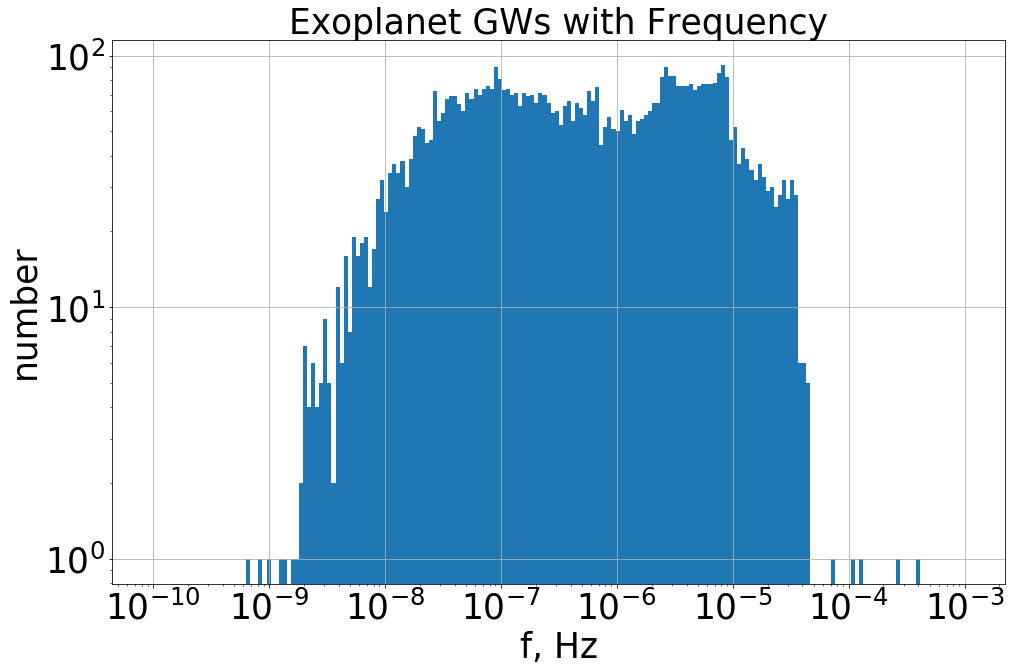

Round trip time for LISA lasers along leg  16.6782047599076  secs,  and frequency of  0.0599584916  Hz, and C&R $f_\star$  0.01908538063694777  Hz
Max GW frequency in Hz, NOT with GW modeset yet  0.0003827983949318424


In [21]:
# Build the XX and YY's from the modesets and the orbital freq.
# time to get fancy
afig = plt.figure( )

ax = afig.add_subplot((111))

myfreqs = []
for irow in range(len(aData)):
    freq0 = aData['freq0'].values[irow]
    modes = aData['modes'].values[irow]  # a list not np.array
    for im in modes:
        myfreqs.append( im*freq0 )

print(len(myfreqs))

# Log plot need even bins in Log-Space??
binmin = 1e-10
binmax = 0.001
nbins = 200
mybins = np.logspace(np.log10(binmin), np.log10(binmax), (nbins+1))

ax.hist(myfreqs, bins=mybins)
    
ax.set_title('Exoplanet GWs with Frequency')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('number')
#ax.set_ylim( (0.7, 10000) )
ax.set_xscale('log')
ax.set_xlabel('f, Hz')
ax.grid(True)

if savePlot:
    plt.savefig('../poster/pix/exopGWFreqsHisto.svg')
    plt.savefig('../poster/pix/exopGWFreqsHisto.png')
plt.show()

#Print the max orb freq
print( 'Round trip time for LISA lasers along leg ', (2.0*2.5e9)/cee, ' secs,  and frequency of ',
      cee/(2.0*2.5e9), ' Hz, and C&R $f_\star$ ', (cee/(2*np.pi*2.5e9)), ' Hz' )
print( 'Max GW frequency in Hz, NOT with GW modeset yet ', np.max( myfreqs ) )

In [22]:
aa = gwt.lisa_psd()  # there is an interp1d option kind='linear' and kind='log'
aa([12.3e-3, 1e-8, 1e-6])  # S_n(f) per Hz

array([3.07258155e-40, 3.94217686e-09, 3.94225804e-21])

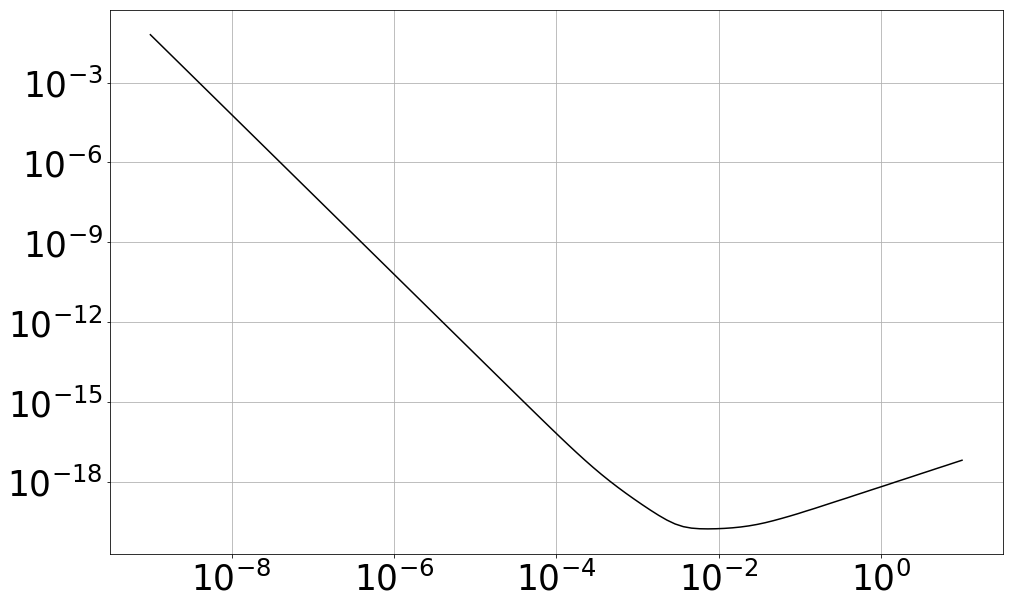

In [23]:
ff = np.logspace(-9,1,100)
yy = np.sqrt( aa(ff) )
plt.loglog(ff, yy, 'k-')
plt.grid(True)

## Plot the comb of modes for the highest eccentricity in the exop dbase

In [24]:
eccMax = np.max( aData['pl_orbeccen'].values )
print('Max eccentricity ', eccMax)
aa = aData['pl_orbeccen'].values  # grab the numpy array of the columns
bb = np.where(aa>0.9)
print('Indices of top few exops ', bb)
print('The top few are:')
for ii in range(len(bb[0])):  # Note that the above is a tuple.
    index = bb[0][ii]
    #print(index)
    print( '%d %s %s %f'%(index, aData['pl_hostname'].values[index], aData['pl_letter'].values[index], 
                         aData['pl_orbeccen'].values[index] ) )

Max eccentricity  0.956
Indices of top few exops  (array([158, 218, 839]),)
The top few are:
158 HD 4113 b 0.903000
218 HD 20782 b 0.956000
839 HD 80606 b 0.933200


In [25]:
aData.head(3)  # Get columns

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx,orbFreqs,chirpMassMsols,freq0,modes,hhmodes
0,HD 142022 A,b,Radial Velocity,1928.0,3.03,0.5300,5.100,35.87,0.99,2014-05-14,27.88,6.003150e-09,0.040754,6.003150e-09,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.8702816437643177e-26, 2.1740658908129503e-2..."
1,HD 39091,b,Radial Velocity,2151.0,3.38,0.6405,10.270,18.21,1.10,2014-07-23,54.92,5.380788e-09,0.064644,5.380788e-09,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[8.230508420052954e-26, 4.507375225359441e-26,..."
2,HD 137388 A,b,Radial Velocity,330.0,0.89,0.3600,0.223,38.45,0.86,2014-05-14,26.01,3.507295e-08,0.005896,3.507295e-08,"[1, 2, 3, 4, 5, 6, 7]","[1.6721119496253516e-27, 4.481574164761941e-27..."


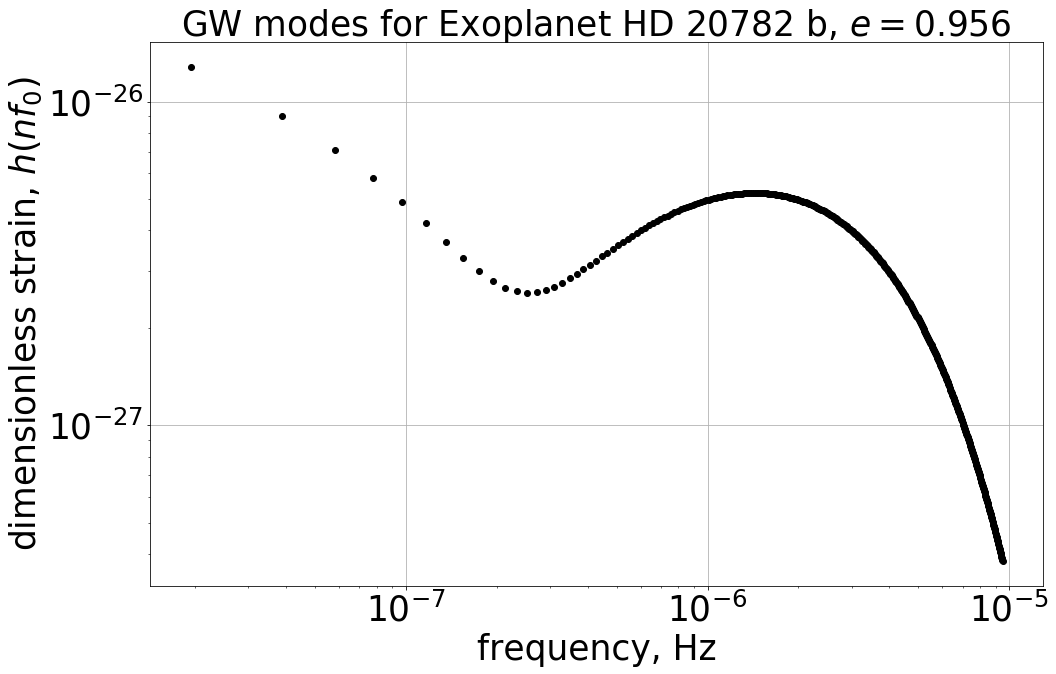

In [31]:
indMaxEcc = 218
name = aData['pl_hostname'].values[indMaxEcc]+' '+aData['pl_letter'].values[indMaxEcc]
ecc = aData['pl_orbeccen'].values[indMaxEcc]

# time to get fancy
afig = plt.figure( )

ax = afig.add_subplot((111))

#aData.plot(x = 'modes', y = 'hhmodes', ax=ax)
xx = np.array( aData['modes'].values[indMaxEcc] )*aData['freq0'].values[indMaxEcc]  # frequencies
yy = aData['hhmodes'].values[indMaxEcc]

ax.loglog(xx, yy, 'ko')
#ax.semilogy(xx, yy, 'ko') # Looks kind of odd.

ax.set_title('GW modes for Exoplanet %s, $e=$%5.3f'%(name, ecc) )
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('dimensionless strain, $h(n f_{0})$')
ax.set_xlabel('frequency, Hz')
plt.grid(True)

if savePlot:
    plt.savefig('../poster/pix/exopMaxEcc.svg')
    plt.savefig('../poster/pix/exopMaxEcc.png')

plt.show()